# 可视化数据

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
play_data = pd.read_csv('inputData/player_data.csv')
play_data['rival'] = play_data['rival'].str.extract('(\d{0,2}.*?)\d')

In [4]:
total_score = play_data.groupby('rival').sum().iloc[1:,2:].sort_values('scores',ascending=False)

In [31]:
play_data['race_rst'] = play_data['race_rst'].replace(['负'],0)
play_data['race_rst'] = play_data['race_rst'].replace(['胜'],1)#胜为1，负为0

In [32]:
low_rate_team = play_data.groupby('rival').mean().iloc[1:,0:1].sort_values('race_rst').reset_index().head(5)
high_rate_team =  play_data.groupby('rival').mean().iloc[1:,0:1].sort_values('race_rst',ascending=False).reset_index().head(5)

In [33]:
high_rate_team

,rival,race_rst
0,独行侠,1.000000
1,骑士,0.928571
2,山猫,0.857143
3,黄蜂,0.800000
4,76人,0.795455


In [9]:
scores_rank = play_data.sort_values('scores',ascending=False).head(10)

In [22]:
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']

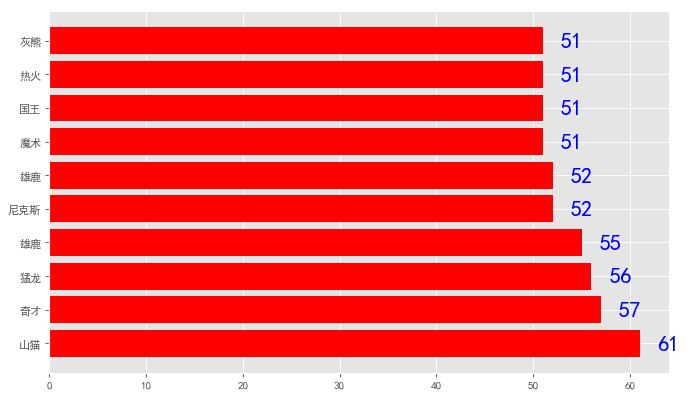

In [23]:
x = scores_rank['rival']
y = scores_rank['scores']
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(np.arange(len(x)),y,color=['r'],tick_label=x)
for a,b in zip(np.arange(len(x)),y):
    ax.text(b+3,a-0.2,b,ha="center",fontsize=20,color='b')

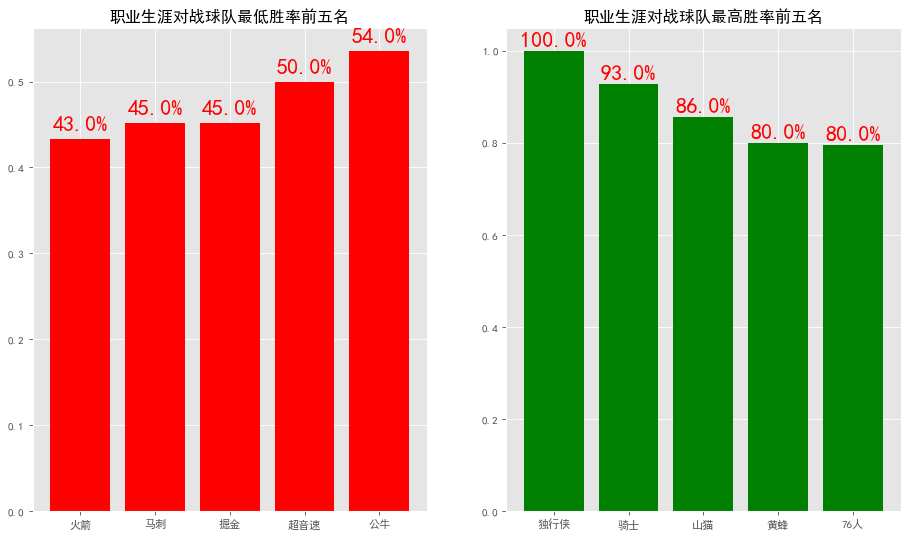

In [38]:
x1 = low_rate_team['rival']
y1 = low_rate_team['race_rst']
plt.style.use("ggplot")
fig= plt.figure(figsize=(14,8),dpi=80)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(np.arange(len(x)),y1,tick_label=x1,color=['r'])
ax1.set_title('职业生涯对战球队最低胜率前五名')
for a,b in zip(np.arange(len(x)),y):
    ax1.text(a,b+0.01,str(round(b,2)*100)+'%',ha="center",fontsize=20,color='red')
    
x2 = high_rate_team['rival']
y2= high_rate_team['race_rst']
ax2.bar(np.arange(len(x)),y2,tick_label=x2,color=['g'])
ax2.set_title('职业生涯对战球队最高胜率前五名')
for a,b in zip(np.arange(len(x)),y2):
    ax2.text(a,b+0.01,str(round(b,2)*100)+'%',ha="center",fontsize=20,color='red')

In [45]:
play_data.groupby('rival').sum().iloc[1:,2:].sort_values('scores',ascending=False).to_csv('rst.csv')

In [46]:
team_loc = pd.read_csv('team1.csv')

In [57]:
team_loc.iloc[:,4:6].groupby('state').sum().sort_values('scores',ascending=False).to_csv('team2.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
players_career_data = pd.read_csv('inputData/players_career_data.csv')

In [8]:
players_career_data.head(5)

,chinese_name,english_name,points,assists,rebounds,steals,shot_rate,block
0,勒布朗-詹姆斯,LeBron James,27.2,7.2,7.4,1.6,50.4,0.8
1,斯蒂芬-库里,Stephen Curry,23.5,6.6,4.5,1.7,47.7,0.2
2,詹姆斯-哈登,James Harden,24.2,6.2,5.2,1.6,44.2,0.5
3,科比-布莱恩特,Kobe Bryant,25.0,4.7,5.2,1.4,44.7,0.5
4,凯文-杜兰特,Kevin Durant,27.1,4.1,7.1,1.1,49.2,1.1


In [9]:
max_lst = list(np.array(players_career_data.describe().iloc[7:8,:])[0])

In [13]:
data = np.array(players_career_data.iloc[4:5,2:])[0]
data =np.array([data[i]/max_lst[i] for i in range(6)])
data

array([0.90033223, 0.36607143, 0.52205882, 0.47826087, 0.73432836,
       0.35483871])

No handles with labels found to put in legend.


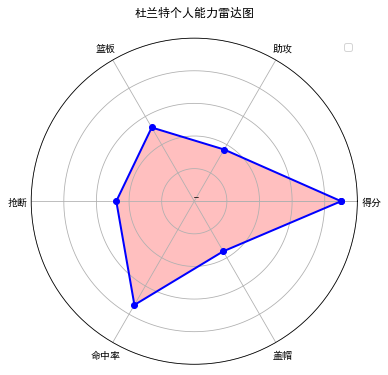

In [15]:
plt.rcParams['font.sans-serif']=['SimHei']
#=======自己设置开始============
#标签
labels = ['得分','助攻','篮板','抢断','命中率','盖帽']
#数据个数
dataLenth = 6
#数据
data = []
data1 = np.concatenate((data, [data[0]]))
#data2 = np.concatenate((data2, [data2[0]]))
#========自己设置结束============

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data1, 'bo-', linewidth=2)# 画线
ax.fill(angles, data1, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("杜兰特个人能力雷达图")
ax.set_rgrids(np.arange(0,1.2,0.2),'-')
plt.legend(loc="upper right")
ax.grid(True)
plt.show()

In [1]:
import pandas as pd

In [26]:
df = pd.read_csv('inputData/visbible_data.csv')

In [27]:
df

,球队名称,投篮命中率,三分命中率,罚球命中率,进攻篮板,防守篮板,助攻,盖帽,抢断,失误,得分,失分
0,亚特兰大老鹰队,45.1,35.2,75.2,11.6,34.5,25.8,5.1,8.2,16.6,113.3,119.4
1,夏洛特黄蜂队,44.8,35.1,79.7,10.0,33.9,23.2,5.0,7.2,11.6,110.7,111.8
2,迈阿密热火队,45.0,34.9,69.5,11.3,35.1,24.3,5.5,7.6,14.1,105.7,105.9
3,奥兰多魔术队,45.4,35.6,78.2,10.0,35.4,25.5,5.5,6.6,12.6,107.3,106.6
4,华盛顿奇才队,46.8,34.1,76.8,9.7,32.6,26.3,4.6,8.4,13.6,114.0,116.9
5,芝加哥公牛队,45.3,35.1,78.3,8.7,34.2,21.9,4.3,7.4,13.5,104.9,113.4
6,克里夫兰骑士队,44.4,35.5,79.2,10.7,32.0,20.7,2.4,6.5,12.7,104.5,114.1
7,底特律活塞队,44.0,34.8,74.7,11.5,33.6,22.5,4.0,7.0,13.0,107.0,107.3
8,印第安纳步行者队,47.5,37.4,75.2,9.3,33.7,26.0,5.0,8.7,13.3,108.0,104.7
9,密尔沃基雄鹿队,47.6,35.2,77.3,9.3,40.5,26.0,5.9,7.5,13.3,118.1,109.3


In [28]:
df = df.set_index('球队名称')
df = df[['得分','投篮命中率','三分命中率','罚球命中率','进攻篮板','助攻','失分','防守篮板','盖帽','失误']]

In [49]:
datas = df.loc[df.index=='洛杉矶湖人队'].iloc[0,:]

In [47]:
ranks = df.rank(method='max',ascending=False).loc[df.index=='洛杉矶湖人队'].iloc[0,:]

No handles with labels found to put in legend.


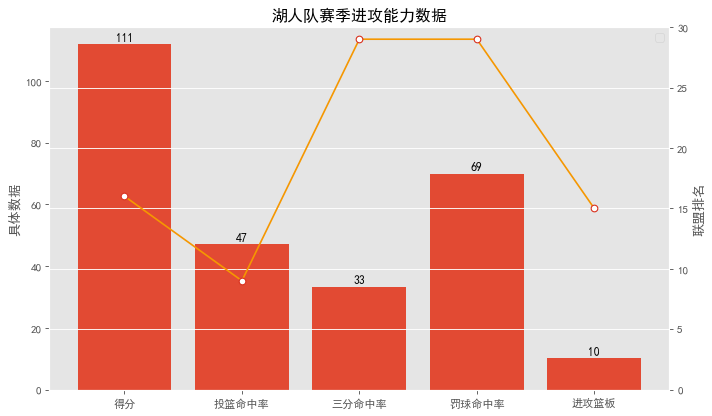

In [56]:
plt.style.use("ggplot")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

x = datas.index[0:5]
y = datas.values[0:5]

fig,ax1 = plt.subplots(figsize=(10,6),dpi=80)

ax1.bar(np.arange(len(x)),y,tick_label=x)
ax1.set(ylabel="具体数据",title="湖人队赛季进攻能力数据")
for a,b in zip(np.arange(len(x)),y):
    ax1.text(a,b+1,int(b),ha="center",fontsize=10.5)
ax1.grid(False)

ax2 = ax1.twinx()  #建立次坐标轴
cumsum_data = ranks.values[0:5]  
ax2.plot(np.arange(len(x)),cumsum_data,marker="o",color=(245/255,151/255,1/255),mec=(217/255,49/255,30/255),mfc="white")
ax2.set_ylim(0,30)
ax2.set_ylabel("联盟排名")
ax1.legend()


No handles with labels found to put in legend.


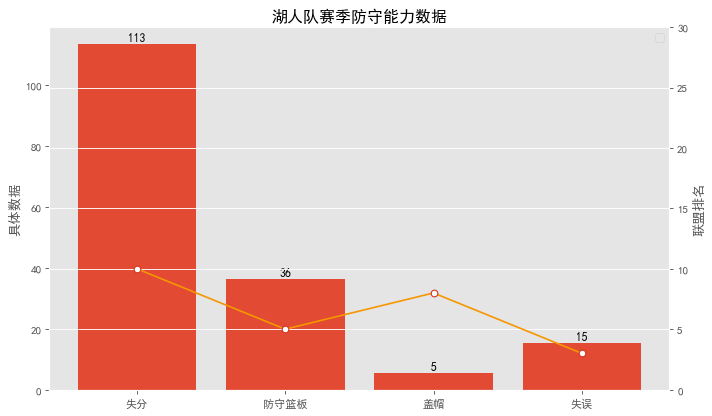

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

x = datas.index[6:]
y = datas.values[6:]

fig,ax1 = plt.subplots(figsize=(10,6),dpi=80)

ax1.bar(np.arange(len(x)),y,tick_label=x)
ax1.set(ylabel="具体数据",title="湖人队赛季防守能力数据")
for a,b in zip(np.arange(len(x)),y):
    ax1.text(a,b+1,int(b),ha="center",fontsize=10.5)
ax1.grid(False)

ax2 = ax1.twinx()  #建立次坐标轴
cumsum_data = ranks.values[6:]  #求出贡献度，也即是逐步的累计金额/总金额
ax2.plot(np.arange(len(x)),cumsum_data,marker="o",color=(245/255,151/255,1/255),mec=(217/255,49/255,30/255),mfc="white")
ax2.set_ylim(0,30)
ax2.set_ylabel("联盟排名")
ax1.legend()